# Clean And Analyze Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of the `Department of Education, Training and Employment` (DETE) and the `Technical and Further Education` (TAFE) institute in Queensland, Australia.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for **both** surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers.

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

In [1]:
import numpy as np
import pandas as pd
dete_survey=pd.read_csv("dete_survey.csv")
tafe_survey=pd.read_csv("tafe_survey.csv")

## DETE dataset Overview

In [2]:
print(dete_survey.shape)
dete_survey.info()

(822, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical wo

In [3]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
pd.set_option('display.max_columns', None)
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey["SeparationType"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [6]:
dete_survey["Cease Date"].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2013         2
04/2014         2
08/2012         2
07/2014         2
02/2014         2
09/2014         1
2014            1
07/2012         1
09/2010         1
11/2012         1
2010            1
07/2006         1
Name: Cease Date, dtype: int64

In [7]:
dete_survey["DETE Start Date"].value_counts()

Not Stated    73
2011          40
2007          34
2008          31
2012          27
2010          27
2009          24
2006          23
1970          21
1975          21
2013          21
2005          20
1990          20
1999          19
1996          19
1992          18
2004          18
1991          18
2000          18
1989          17
2002          15
2003          15
1978          15
1988          15
1976          15
1995          14
1998          14
1980          14
1979          14
1997          14
1974          14
1993          13
1972          12
1986          12
1977          11
2001          10
1971          10
1969          10
1984          10
1994          10
1983           9
1981           9
1985           8
1973           8
1987           7
1963           4
1982           4
1968           3
1967           2
1966           1
1965           1
Name: DETE Start Date, dtype: int64

In [8]:
dete_survey["Age"].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

## TAFE dataset Overview

In [9]:
print(tafe_survey.shape)
tafe_survey.info()

(702, 72)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                  

In [10]:
pd.set_option('display.max_columns', None)
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

Based on the above quick overviews of 2 datasets we can make next observations:

- The `dete_survey` dataframe contains `Not Stated` values that indicate values are missing, but they aren't represented as `NaN`.
- Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues: to fix the missing values first, then we'll drop columns we know we don't need for our analysis.

## Fixing the missing values and dropping columns

In [11]:
dete_survey=pd.read_csv("dete_survey.csv", na_values="Not Stated")

In [12]:
drop_cols=dete_survey.columns[28:49]
dete_survey_updated=dete_survey.drop(drop_cols, axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [13]:
dete_survey_updated.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [14]:
drop_cols2=["Aboriginal", "Torres Strait", "South Sea", "Disability", "NESB"]
dete_survey_updated=dete_survey_updated.drop(drop_cols2, axis=1)
dete_survey_updated.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [15]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older


In [16]:
drop_cols=tafe_survey.columns[17:66]
tafe_survey_updated=tafe_survey.drop(drop_cols, axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [17]:
tafe_survey_updated.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
Contributing Factors. Career Move - Public Sector                            265
Contributing Factors. Career Move - Private Sector                           265
Contributing Factors. Career Move - Self-employment                          265
Contributing Factors. Ill Health                                             265
Contributing Factors. Maternity/Family                                       265
Contributing Factors. Dissatisfaction                                        265
Contributing Factors. Job Dissatisfaction                                    265
Contributing Factors. Interp

Next, let's turn our attention to the column names. Each dataframe contains many of the same columns, but the column names are different. Because we eventually want to combine them, we'll have to standardize the column names. Let's rename them and standardize.

## Renaming the columns

In [18]:
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age'],
      dtype='object')

In [19]:
tafe_survey_updated.columns
new_cols=['id', 'Institute', 'WorkArea', 'cease_date',
       'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'gender', 'age',
       'employment_status', 'position',
       'institute_service',
       'role_service']
tafe_survey_updated.columns=new_cols
tafe_survey_updated.columns=tafe_survey_updated.columns.str.lower().str.strip().str.replace(".","").str.replace("-","").str.replace('\s+', ' ').str.replace(" ", "_")
tafe_survey_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors_career_move_public_sector',
       'contributing_factors_career_move_private_sector',
       'contributing_factors_career_move_selfemployment',
       'contributing_factors_ill_health',
       'contributing_factors_maternity/family',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [20]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older


In [21]:
tafe_survey_updated.head()

,id,institute,workarea,cease_date,separationtype,contributing_factors_career_move_public_sector,contributing_factors_career_move_private_sector,contributing_factors_career_move_selfemployment,contributing_factors_ill_health,contributing_factors_maternity/family,contributing_factors_dissatisfaction,contributing_factors_job_dissatisfaction,contributing_factors_interpersonal_conflict,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Recall that our end goal is to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string `"Resignation"`.

## Extracting data with resignation separation types

In [22]:
dete_survey_updated["separationtype"].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [23]:
tafe_survey_updated["separationtype"].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [24]:
pattern=r"\bResignation\b"
dete_resign=dete_survey_updated["separationtype"].str.contains(pattern)
dete_resignations=dete_survey_updated[dete_resign].copy()
dete_resignations.shape

(311, 30)

In [25]:
tafe_resign=tafe_survey_updated["separationtype"]=="Resignation"
tafe_resignations=tafe_survey_updated[tafe_resign].copy()
tafe_resignations.shape

(340, 23)

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. However, we encourage you to check the data for other issues as well!

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

## Verifying and cleaning the date data

In [26]:
dete_resignations["cease_date"].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [27]:
dete_resignations["cease_date"]=dete_resignations["cease_date"].str.strip().str.replace("/", "").str[-4:]
dete_resignations["cease_date"].value_counts(dropna=False)

2013    146
2012    129
2014     22
NaN      11
2010      2
2006      1
Name: cease_date, dtype: int64

In [28]:
dete_resignations["cease_date"]=dete_resignations["cease_date"].astype(float)
dete_resignations["cease_date"].value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [29]:
dete_resignations["dete_start_date"].value_counts(dropna=False).sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64

In [30]:
dete_resignations["dete_start_date"]=dete_resignations["dete_start_date"].astype(float)

In [31]:
tafe_resignations["cease_date"].value_counts(dropna=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: cease_date, dtype: int64

In [32]:
tafe_resignations["cease_date"].dtypes

dtype('float64')

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of *service*.

You may have noticed that the `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in `dete_resignations`.

## Creating new column

In [33]:
dete_resignations["institute_service"]=dete_resignations["cease_date"]-dete_resignations["dete_start_date"]
dete_resignations["institute_service"].value_counts(dropna=False).sort_index().head()

0.0    20
1.0    22
2.0    14
3.0    20
4.0    16
Name: institute_service, dtype: int64

Next, we'll identify any employees who resigned because they were dissatisfied.

## Identifying dissatisfied employees

In [34]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'institute_service'],
      dtype='object')

In [35]:
tafe_resignations.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors_career_move_public_sector',
       'contributing_factors_career_move_private_sector',
       'contributing_factors_career_move_selfemployment',
       'contributing_factors_ill_health',
       'contributing_factors_maternity/family',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

**1. dete_resignations:**

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

**2. tafe_resignations:**

- contributing_factors_dissatisfaction
- contributing_factors_job_dissatisfaction

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column.

In [36]:
dete_resignations.iloc[:, 13:27].head()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,True,True,False,False,False,False,False


In [37]:
tafe_resignations['contributing_factors_dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: contributing_factors_dissatisfaction, dtype: int64

In [38]:
tafe_resignations['contributing_factors_job_dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: contributing_factors_job_dissatisfaction, dtype: int64

In [39]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val=="-":
        return False
    else:
        return True
    
cols=["contributing_factors_dissatisfaction", "contributing_factors_job_dissatisfaction"]
tafe_resignations[cols]=tafe_resignations[cols].applymap(update_vals)

In [40]:
print(tafe_resignations['contributing_factors_dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['contributing_factors_job_dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: contributing_factors_dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: contributing_factors_job_dissatisfaction, dtype: int64


Above we converted values in the `contributing_factors_dissatisfaction` and `contributing_factors_job_dissatisfaction` columns to `True`, `False`, or `NaN` values to make them identical as in the dissatisfied columns from dete_resignations dataset.

Next, we will create new column named `dissatisfied` indicating if an employee resigned because they were dissatisfied in some way, where we will insert: 

- `True` value if *any* of the columns listed above contain a `True` value
- `False` if *none* of the elements in the selected columns above is `True`
- `NaN` if the value is `NaN`

In [41]:
tafe_resignations["dissatisfied"]=tafe_resignations[cols].any(axis=1, skipna=False)
cols1=["contributing_factors_dissatisfaction", "contributing_factors_job_dissatisfaction", "dissatisfied"]
tafe_resignations[cols1].head(20)

,contributing_factors_dissatisfaction,contributing_factors_job_dissatisfaction,dissatisfied
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False
10,False,False,False
13,False,False,False
14,True,True,True


In [42]:
tafe_resignations["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [43]:
up_cols=['id', 'cease_date', 'separationtype',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction', 'dissatisfied', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service']
tafe_resignations_up=tafe_resignations[up_cols].copy()
tafe_resignations_up.head(5)

,id,cease_date,separationtype,contributing_factors_dissatisfaction,contributing_factors_job_dissatisfaction,dissatisfied,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,2010.0,Resignation,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,2010.0,Resignation,False,False,False,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,2010.0,Resignation,False,False,False,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,2010.0,Resignation,False,False,False,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,2010.0,Resignation,False,False,False,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [44]:
dete_cols=['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
           'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions',
           'work_life_balance', 'workload']
dete_resignations["dissatisfied"]=dete_resignations[dete_cols].any(axis=1, skipna=False)
dete_cols=['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
           'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions',
           'work_life_balance', 'workload', 'dissatisfied']
dete_resignations[dete_cols].head()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload,dissatisfied
3,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,True
8,False,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False,True
11,False,False,False,False,False,False,False,False,False,False


In [45]:
dete_up_cols=['id', 'separationtype', 'cease_date', 'dete_start_date', 
              'position', 'employment_status','job_dissatisfaction', 
              'dissatisfaction_with_the_department', 'physical_work_environment',
           'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions',
           'work_life_balance', 'workload', 'dissatisfied','gender', 'age', 'institute_service']
dete_resignations_up=dete_resignations[dete_up_cols].copy()
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,position,employment_status,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload,dissatisfied,gender,age,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,Teacher,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,Female,36-40,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,Guidance Officer,Permanent Full-time,False,False,False,False,False,False,True,False,False,True,Female,41-45,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,Teacher,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,Female,31-35,3.0
9,10,Resignation-Other employer,2012.0,1997.0,Teacher Aide,Permanent Part-time,True,True,False,False,False,False,False,False,False,True,Female,46-50,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,Teacher,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,Male,31-35,3.0


Above we remained usefull columns for the analysis for both datasets. Next, let's rename some TAFE columns to make them identical for both datasets.

In [46]:
dete_resignations_up.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date', 'position',
       'employment_status', 'job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance', 'workload',
       'dissatisfied', 'gender', 'age', 'institute_service'],
      dtype='object')

In [47]:
tafe_resignations_up.columns

Index(['id', 'cease_date', 'separationtype',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction', 'dissatisfied', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [48]:
new_name_cols=['id', 'cease_date', 'separationtype','dissatisfaction','job_dissatisfaction', 
               'dissatisfied', 'gender', 'age', 'employment_status', 'position', 'institute_service',
       'role_service']
tafe_resignations_up.columns=new_name_cols
tafe_resignations_up.columns

Index(['id', 'cease_date', 'separationtype', 'dissatisfaction',
       'job_dissatisfaction', 'dissatisfied', 'gender', 'age',
       'employment_status', 'position', 'institute_service', 'role_service'],
      dtype='object')

Below we will create new `institute` column for both datasets to easily distinguish between the two after combining the data.

## Combining the data

In [49]:
dete_resignations_up["institute"]="DETE"
tafe_resignations_up["institute"]="TAFE"
combined=pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
print(combined.isnull().sum())
print(combined.shape)

age                                     55
cease_date                              16
dete_start_date                        368
dissatisfaction                        319
dissatisfaction_with_the_department    340
dissatisfied                             8
employment_conditions                  340
employment_status                       54
gender                                  59
id                                       0
institute                                0
institute_service                       88
job_dissatisfaction                      8
lack_of_job_security                   340
lack_of_recognition                    340
physical_work_environment              340
position                                53
role_service                           361
separationtype                           0
work_life_balance                      340
work_location                          340
workload                               340
dtype: int64
(651, 22)


C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
import seaborn as sns
combined_updated = combined.set_index('institute')
ax=sns.heatmap(combined_updated.isnull(), cbar=False)
ax

In [51]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, DETE to TAFE
Data columns (total 21 columns):
age                                    596 non-null object
cease_date                             635 non-null float64
dete_start_date                        283 non-null float64
dissatisfaction                        332 non-null object
dissatisfaction_with_the_department    311 non-null object
dissatisfied                           643 non-null object
employment_conditions                  311 non-null object
employment_status                      597 non-null object
gender                                 592 non-null object
id                                     651 non-null float64
institute_service                      563 non-null object
job_dissatisfaction                    643 non-null object
lack_of_job_security                   311 non-null object
lack_of_recognition                    311 non-null object
physical_work_environment              311 non-null object
position

## Cleaning the servise duration data

In [52]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


To analyze the data, we'll convert these numbers into categories basing on the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the below groups:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Let's categorize the values in the `institute_service` column using the definitions above.

In [53]:
combined_updated["institute_service"]=combined_updated["institute_service"].astype(str).str.extract(r'(\d+)') # To extract first number from a string
combined_updated["institute_service"]=combined_updated["institute_service"].astype(float)
combined_updated["institute_service"].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [54]:
def service_cat(val):
    if pd.isnull(val):
        return np.nan
    elif val<3:
        return "New"
    elif val>=3 and val<=6:
        return "Experienced"
    elif val>=7 and val<=10:
        return "Established"
    elif val>=11:
        return "Veteran"
    
combined_updated["service_cat"]=combined_updated["institute_service"].apply(service_cat)
combined_updated["service_cat"].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Initial dissatisfaction analysis by service duration

Below, in the first order we will fill in missing values in the dissatisfied column with the value that occurs most frequently in this column, either `True` or `False`.

In [55]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [56]:
combined_updated["dissatisfied"]=combined_updated["dissatisfied"].fillna(False)
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

Recall that the `dissatisfied` column consists of Boolean values, meaning they're either `True` or `False`. Methods such as the `df.pivot_table()` method actually treat Boolean values as integers, so a `True` value is considered to be `1` and a `False` value is considered to be `0`.

Since a `True` value is considered to be `1`, calculating the mean will also calculate the percentage of dissatisfied employees.

In [57]:
serv_diss=round(combined_updated.pivot_table(values='dissatisfied', index='service_cat', 
                                   aggfunc='mean'), 2)
serv_diss

,dissatisfied
service_cat,
Established,0.52
Experienced,0.34
New,0.30
Veteran,0.49


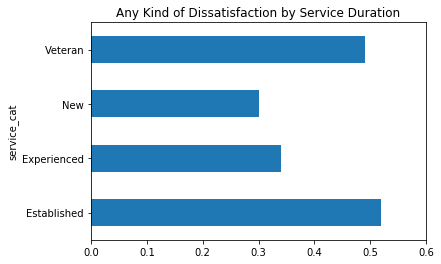

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
serv_diss.plot(kind='barh', title='Any Kind of Dissatisfaction by Service Duration', 
               xlim=(0,0.6), legend=False)

To answer on the first of our goal's question as:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Short period workers discribed by `New` service category which were less than 3 years at a company, above on the plot we can notice that they are the least represanted category of workers who are resigned due to any kind of dissatisfactions, instead we can see that the workers with experience 7+ years are rather resigned due to any kind of dissatisfactions in the work.

Let's consider the same split but for each institute separately.

In [59]:
inst_serv_diss=round(combined_updated.pivot_table(values='dissatisfied', index=['institute','service_cat'], 
                                   aggfunc='mean'), 2)
inst_serv_diss

dissatisfied
institute service_cat              
DETE      Established          0.61
          Experienced          0.46
          New                  0.38
          Veteran              0.56
TAFE      Established          0.33
          Experienced          0.25
          New                  0.26
          Veteran              0.28

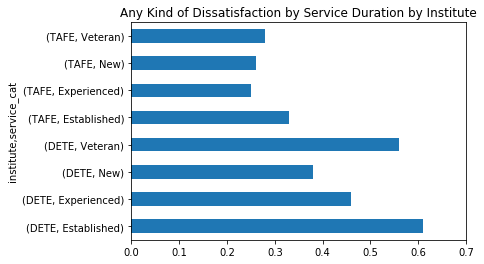

In [60]:
inst_serv_diss.plot(kind='barh', title='Any Kind of Dissatisfaction by Service Duration by Institute', 
               xlim=(0,0.7), legend=False)

The most dissatisfied resigned workers are from the `DETE` institute, still they are mostly 7+ years experienced. The same trend is for the `TAFE` institute, but here `New` emloyees are not the least non-dissatisfied group. If compare `New` employees between both institutes we can definetly see that the `New` ones from `DATE` institute are more dissatisfied than any caree stage category in the `TAFE` institute. Generaly we can say that employees in the `DETE` survey end their employment because they were dissatisfied in some way more frequently than employees from `TAFE` survey.

## How many people in each career stage resigned due to each kind of dissatisfaction?

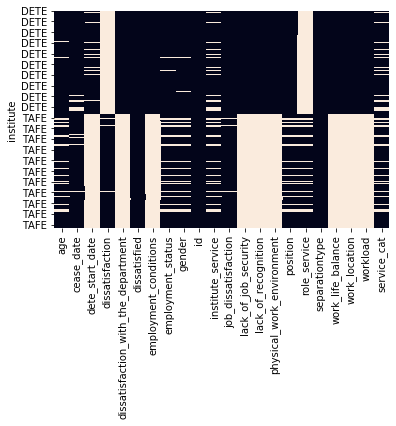

In [61]:
import seaborn as sns
ax=sns.heatmap(combined_updated.isnull(), cbar=False)
ax

Above we can see that to review each career stage resigned due to each kind of dissatisfaction will be better if to split this analysis into 2 institute groups because of missing values for each dissatisfaction in both institutes. So we will consider service duration via each kind of dissatisfaction for both `DETE` and `TAFE` groups separately.

### TAFE Institute.

In [62]:
tafe=combined_updated.index.get_level_values('institute')=="TAFE"
tafe
tafe_cols_diss=["dissatisfaction","job_dissatisfaction"]
tafe_diss=combined_updated.loc[tafe, tafe_cols_diss]
tafe_diss

,dissatisfaction,job_dissatisfaction
institute,,
TAFE,False,False
TAFE,False,False
TAFE,False,False
TAFE,False,False
TAFE,False,False
...,...,...
TAFE,False,False
TAFE,False,False
TAFE,False,False


In [63]:
tafe_diss["dissatisfaction"].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: dissatisfaction, dtype: int64

In [64]:
tafe_diss["job_dissatisfaction"].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: job_dissatisfaction, dtype: int64

Above, separate dissatisfactions for `TAFE` institute have missing values, which we will next fill in with the most frequency appeared values for this each column, so it will be `False` values.

In [65]:
tafe_diss=tafe_diss.fillna(False)
tafe_diss["dissatisfaction"].value_counts(dropna=False)

False    285
True      55
Name: dissatisfaction, dtype: int64

In [66]:
tafe_diss["job_dissatisfaction"].value_counts(dropna=False)

False    278
True      62
Name: job_dissatisfaction, dtype: int64

Because pivot_table method requires numerical values to count result, next we will change them to Boolean values, where `True` value is considered to be `1` and a `False` value is considered to be `0`.

In [67]:
combined_updated[tafe_cols_diss]=combined_updated[tafe_cols_diss].astype(bool)

In [68]:
combined_updated[tafe].info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, TAFE to TAFE
Data columns (total 22 columns):
age                                    290 non-null object
cease_date                             335 non-null float64
dete_start_date                        0 non-null float64
dissatisfaction                        340 non-null bool
dissatisfaction_with_the_department    0 non-null object
dissatisfied                           340 non-null bool
employment_conditions                  0 non-null object
employment_status                      290 non-null object
gender                                 290 non-null object
id                                     340 non-null float64
institute_service                      290 non-null float64
job_dissatisfaction                    340 non-null bool
lack_of_job_security                   0 non-null object
lack_of_recognition                    0 non-null object
physical_work_environment              0 non-null object
position                 

In [69]:
tafe_serv_diss=round(combined_updated[tafe].pivot_table(values=tafe_cols_diss, index='service_cat', dropna=False), 2)
tafe_serv_diss

,dissatisfaction,job_dissatisfaction
service_cat,,
Established,0.14,0.29
Experienced,0.16,0.17
New,0.12,0.20
Veteran,0.25,0.17


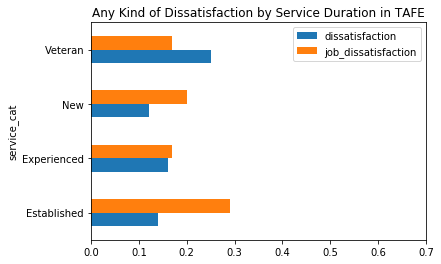

In [70]:
tafe_serv_diss.plot(kind='barh', title='Any Kind of Dissatisfaction by Service Duration in TAFE', 
               xlim=(0,0.7), legend=True)

In the `TAFE` institute New employees has the least general non-specified dissatisafaction, but the high dissatisfaction related with the job - 20 percent, when Established workers with experince 7-10 years have the most dissatisfaction related to the job - about 30 percent, aslo we can see that Veterans are also strongly discribed with general dissatisafaction - 25 percent.

### TEDE Institute.

In [71]:
dete=combined_updated.index.get_level_values('institute')=="DETE"
dete_cols_diss=["dissatisfaction_with_the_department","employment_conditions", "job_dissatisfaction", "lack_of_job_security", "lack_of_recognition", 
                "physical_work_environment", "work_life_balance", "work_location", "workload"]
dete_diss=combined_updated.loc[dete, dete_cols_diss]
dete_diss

,dissatisfaction_with_the_department,employment_conditions,job_dissatisfaction,lack_of_job_security,lack_of_recognition,physical_work_environment,work_life_balance,work_location,workload
institute,,,,,,,,,
DETE,False,False,False,False,False,False,False,False,False
DETE,False,True,False,False,False,False,False,False,False
DETE,False,False,False,False,False,False,False,False,False
DETE,True,False,True,False,False,False,False,False,False
DETE,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
DETE,False,False,False,False,False,False,False,False,False
DETE,False,False,False,False,False,False,False,False,False
DETE,False,False,False,False,False,False,False,False,False


In [72]:
combined_updated[dete_cols_diss]=combined_updated[dete_cols_diss].astype(bool)

In [73]:
combined_updated[dete].info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, DETE to DETE
Data columns (total 22 columns):
age                                    306 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
dissatisfaction                        311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
dissatisfied                           311 non-null bool
employment_conditions                  311 non-null bool
employment_status                      307 non-null object
gender                                 302 non-null object
id                                     311 non-null float64
institute_service                      273 non-null float64
job_dissatisfaction                    311 non-null bool
lack_of_job_security                   311 non-null bool
lack_of_recognition                    311 non-null bool
physical_work_environment              311 non-null bool
position               

In [74]:
dete_serv_diss=round(combined_updated[dete].pivot_table(values=dete_cols_diss, index='service_cat', dropna=False), 2)
dete_serv_diss

,dissatisfaction_with_the_department,employment_conditions,job_dissatisfaction,lack_of_job_security,lack_of_recognition,physical_work_environment,work_life_balance,work_location,workload
service_cat,,,,,,,,,
Established,0.15,0.10,0.20,0.02,0.17,0.02,0.24,0.17,0.10
Experienced,0.09,0.08,0.13,0.04,0.12,0.04,0.18,0.07,0.08
New,0.02,0.04,0.07,0.04,0.04,0.02,0.25,0.02,0.05
Veteran,0.14,0.07,0.16,0.07,0.10,0.01,0.25,0.04,0.11


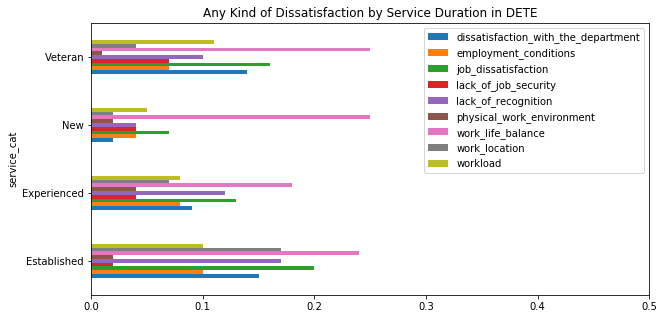

In [75]:
dete_serv_diss.plot(kind='barh', title='Any Kind of Dissatisfaction by Service Duration in DETE', 
               xlim=(0,0.5), legend=True, figsize=(10,5))

Despite the fact that New employees are the least dissatisfied caree stage group in the DETE institute, they are the most dissatisfied group of work life balance factor along with the Veteran - each 25 percent, also this factor is the highest for each service duration group.

The second frequently appeared dissatisfaction factor is job dissatisfaction, we can say that all employees, despite their work experince after dissatisfaction from work-life balance in the work they also may complain on what they do in the work. The most dissatisfied with the job are 7+ years experienced workers, additionally they are also meaningfully dissatisfied with the department, that confirms they would like to do something another. 

As we can notice Lack of recognition is important dissatisfaction factor for all experienced employees with service duration more than 3 years, expecially this factor disturbes strongly experienced workers with experience 7-10 years.

The next significant factor that disgust all employees is the workload, especially this important dissatisfaction factor is for Veterans with 11+ years experince. Also this factor is the third frequently appeared for resigned New workers. 

Instresting is aslo that work location is strongly disgusting factor for 7-10 years experienced employees in the DETE.

Employment conditions are also not unimportant factor for experienced empoyees with 3-10 years of service duration.

## How many people in each age group resgined due to some kind of dissatisfaction?

### Cleaning Age column

In [76]:
print(combined_updated["age"].value_counts(dropna=False))
combined_updated["age"].shape

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64


(651,)

To analyze the age, we'll convert these numbers into age categories.

We'll use the below groups:

- less than 20
- 21-25
- 26-30
- 31-35
- 36-40
- 41-45
- 46-50
- 51-55
- 56+

Let's categorize the values in the `age` column using the definitions above.

In [77]:
combined_updated["age"]=combined_updated["age"].astype(str).str.extract(r'(\d+)') # To extract first number from a string
combined_updated["age"]=combined_updated["age"].astype(float)
print(combined_updated["age"].shape)
combined_updated["age"].value_counts(dropna=False)

(651,)


41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

### Adding new Age_cat column

In [78]:
def age_cat(val):
    if pd.isnull(val):
        return np.nan
    elif val==20:
        return "20 and less"
    elif val==21:
        return "21-25"
    elif val==26:
        return "26-30"
    elif val==31:
        return "31-35"
    elif val==36:
        return "36-40"
    elif val==41:
        return "41-45"
    elif val==46:
        return "46-50"
    elif val==51:
        return "51-55"
    elif val>=56:
        return "56+"
    
combined_updated["age_cat"]=combined_updated["age"].apply(age_cat)
print(combined_updated["age_cat"].shape)
combined_updated["age_cat"].value_counts(dropna=False)

(651,)


41-45          93
46-50          81
56+            78
36-40          73
51-55          71
26-30          67
21-25          62
31-35          61
NaN            55
20 and less    10
Name: age_cat, dtype: int64

### Dissatisfaction analysis by Age

In [79]:
age_diss=round(combined_updated.pivot_table(values='dissatisfied', index='age_cat', 
                                   aggfunc='mean'), 2)
age_diss

,dissatisfied
age_cat,
20 and less,0.20
21-25,0.31
26-30,0.42
31-35,0.38
36-40,0.34
41-45,0.38
46-50,0.38
51-55,0.42
56+,0.42


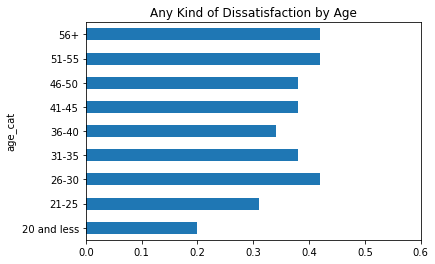

In [80]:
age_diss.plot(kind='barh', title='Any Kind of Dissatisfaction by Age', 
               xlim=(0,0.6), legend=False)

Younger resigned workers up to 25 years inclusive are the least dissatisfied with any kind of factor, then the resigned employees with the most frequently appeared any kind of dissatisfaction factor are the oldest employees with 51+ years and aslo workers 26-30 years.

Let's consider the more detail split for the `DETE` institute separately.

In [81]:
dete_age_diss=round(combined_updated[dete].pivot_table(values=dete_cols_diss, index='age_cat', dropna=False), 2)
dete_age_diss

,dissatisfaction_with_the_department,employment_conditions,job_dissatisfaction,lack_of_job_security,lack_of_recognition,physical_work_environment,work_life_balance,work_location,workload
age_cat,,,,,,,,,
20 and less,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
21-25,0.03,0.03,0.07,0.00,0.17,0.00,0.21,0.03,0.03
26-30,0.09,0.14,0.17,0.06,0.17,0.06,0.14,0.14,0.11
31-35,0.14,0.07,0.21,0.00,0.07,0.00,0.28,0.10,0.03
36-40,0.10,0.07,0.10,0.02,0.05,0.05,0.20,0.05,0.10
41-45,0.06,0.08,0.10,0.04,0.10,0.02,0.25,0.08,0.04
46-50,0.07,0.07,0.07,0.12,0.10,0.00,0.21,0.02,0.07
51-55,0.19,0.06,0.22,0.09,0.12,0.00,0.31,0.00,0.12
56+,0.10,0.06,0.16,0.02,0.10,0.02,0.20,0.04,0.16


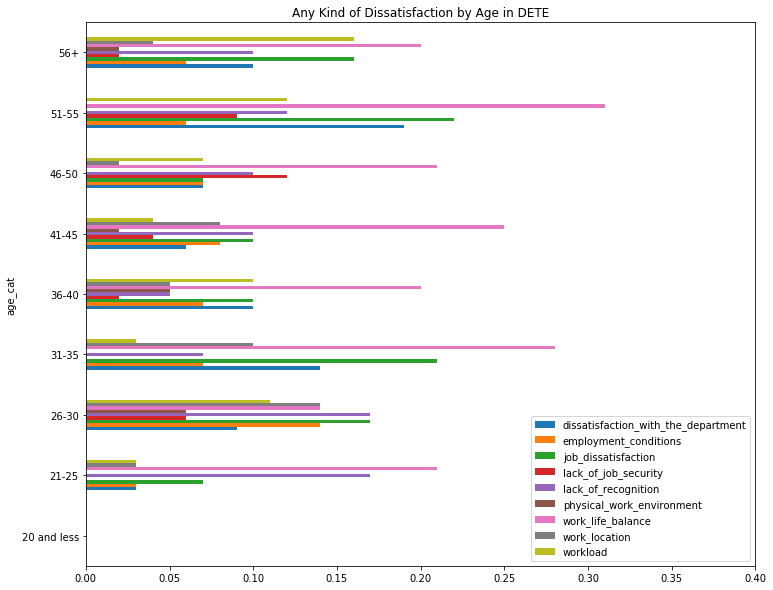

In [82]:
dete_age_diss.plot(kind='barh', title='Any Kind of Dissatisfaction by Age in DETE', 
               xlim=(0,0.4), legend=True, figsize=(12,10))

Work life balance is the main dissatisfaction factor for all age employees except 26-30 group, for them the most disguisting factors are job dissatisfaction and lack of recognition. Instesting that lack of recognition is the second of most dissatisfied factors for younger workers with up to 30 years.

Job dissatisfaction is the second of most dissatisfied factors mainly for older workers 51+ as well as for employee 26-35 years.

Workload is important dissatisafaction factor too for older employees 51+ years, that is understandable.

Intresting that employees 46-50 years are strongly dissatisfied with lack of job security factor.